<p style="text-align: justify;"> O Murder Accountability Project é o banco de dados mais completo de homicídios disponível atualmente nos Estados Unidos. Este conjunto de dados inclui assassinatos do Relatório Suplementar de Homicídios do FBI de 1976 até o presente e dados da Lei de Liberdade de Informação sobre mais de 22.000 homicídios que não foram relatados ao Departamento de Justiça. Este conjunto de dados inclui a idade, raça, sexo, etnia das vítimas e dos perpetradores, além da relação entre a vítima e o perpetrador e a arma utilizada. <p>

https://www.kaggle.com/datasets/murderaccountability/homicide-reports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from wordcloud import WordCloud
from scipy.stats import linregress

In [ ]:
dados = pd.read_csv('database.csv')

<ipython-input-2-e57f6a23e0df>:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv('database.csv')


In [ ]:
df = pd.DataFrame(dados)

## Análise inicial

In [ ]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


In [ ]:
df.dtypes

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

In [ ]:
df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

## Cidades mais mencionadas 🔎

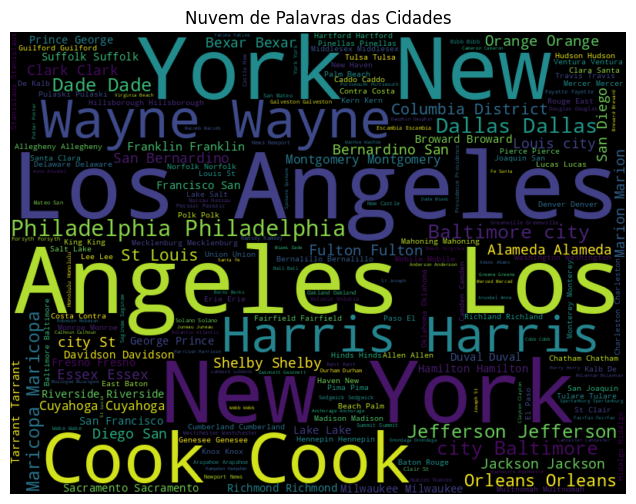

In [ ]:
cities = df['City']
wordcloud = WordCloud(background_color='black', width=800, height=600).generate(' '.join(cities))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras das Cidades')
plt.show()

## Analisando a quantidade de "Assassinatos ou Homicídios Culposos" 😵

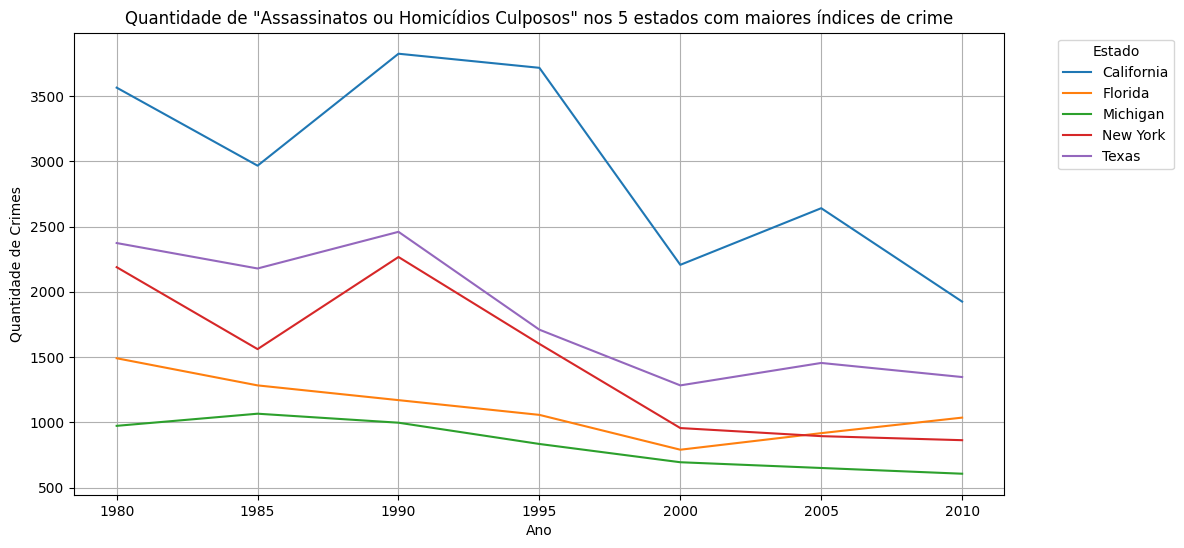

In [ ]:
murder_data = df[df['Crime Type'] == 'Murder or Manslaughter']

# Agrupar por estado e contar o número total de ocorrências em cada estado
total_murder_per_state = murder_data.groupby('State').size().reset_index(name='TotalCount')

# Selecionar os 5 estados com mais ocorrências
top_5_states = total_murder_per_state.nlargest(5, 'TotalCount')['State']

selected_years = [1980, 1985, 1990, 1995, 2000, 2005, 2010]
murder_per_year_state = murder_data[murder_data['State'].isin(top_5_states) & murder_data['Year'].isin(selected_years)]
grouped_data = murder_per_year_state.groupby(['Year', 'State']).size().reset_index(name='TotalCount')

plt.figure(figsize=(12, 6))

for state in grouped_data['State'].unique():
    state_data = grouped_data[grouped_data['State'] == state]
    plt.plot(state_data['Year'], state_data['TotalCount'], label=state)

plt.xlabel('Ano')
plt.ylabel('Quantidade de Crimes')
plt.title('Quantidade de "Assassinatos ou Homicídios Culposos" nos 5 estados com maiores índices de crime')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Podemos observar que o estado da Califórnia apresenta o maior número de casos de assassinatos ou homicídios culposos entre os estados analisados. Ao longo dos anos, há uma tendência de queda na quantidade desses crimes, o que sugere uma possível melhoria nas condições de segurança ou uma mudança nas políticas públicas. Essa diminuição ao longo do tempo é um aspecto positivo que merece ser destacado, indicando um progresso na redução da violência no estado da Califórnia.

### Prevendo o número de "Assassinatos ou Homicídios Culposos" em 2015 🔮

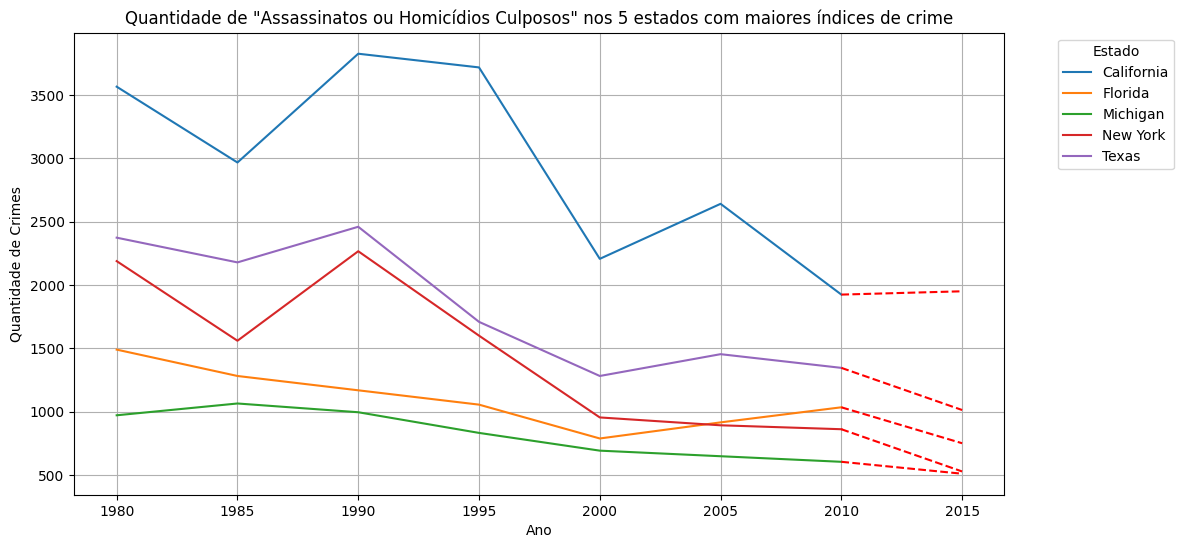

In [ ]:
murder_data = df[df['Crime Type'] == 'Murder or Manslaughter']

total_murder_per_state = murder_data.groupby('State').size().reset_index(name='TotalCount')

top_5_states = total_murder_per_state.nlargest(5, 'TotalCount')['State']

selected_years = range(1980, 2015, 5)  # Anos de 1980 a 2014, de 5 em 5 anos
murder_per_year_state = murder_data[murder_data['State'].isin(top_5_states) & murder_data['Year'].isin(selected_years)]

# Agrupar por ano e estado e somar o total de ocorrências em cada grupo
grouped_data = murder_per_year_state.groupby(['Year', 'State']).size().reset_index(name='TotalCount')

# Criar um modelo de regressão linear para cada estado e fazer previsões para 2015
plt.figure(figsize=(12, 6))

for state in grouped_data['State'].unique():
    # Filtra os dados apenas para o estado atual
    state_data = grouped_data[grouped_data['State'] == state]

    # Extrai os anos (X) e o número de crimes (y) para o estado atual
    X = state_data['Year'].values.reshape(-1, 1)
    y = state_data['TotalCount'].values

    # Cria e ajusta um modelo de regressão linear aos dados do estado atual
    model = LinearRegression()
    model.fit(X, y)

    # Plota os dados do estado atual
    plt.plot(state_data['Year'], state_data['TotalCount'], label=state)

    # Prever a quantidade de crimes para 2015
    prediction_2015 = model.predict([[2015]])
    x_future = np.array([[2015]])
    y_future = model.predict(x_future)

    # Plota uma linha pontilhada vermelha da última observação até a previsão de 2015
    plt.plot([state_data['Year'].iloc[-1], 2015], [state_data['TotalCount'].iloc[-1], y_future[0]], color='red', linestyle='--')

plt.xlabel('Ano')
plt.ylabel('Quantidade de Crimes')
plt.title('Quantidade de "Assassinatos ou Homicídios Culposos" nos 5 estados com maiores índices de crime')
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Dicionários para armazenar as métricas
metrics = {'Estado': [], 'Erro Médio Absoluto': [], 'R²': []}

for state in grouped_data['State'].unique():
    state_data = grouped_data[grouped_data['State'] == state]
    X = state_data['Year'].values.reshape(-1, 1)
    y = state_data['TotalCount'].values
    model = LinearRegression()
    model.fit(X, y)
    # Fazendo previsões
    y_pred = model.predict(X)
    # Calculando métricas
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    # Salvando métricas no dicionário
    metrics['Estado'].append(state)
    metrics['Erro Médio Absoluto'].append(mae)
    metrics['R²'].append(r2)

# Criando DataFrame com as métricas
metrics_df = pd.DataFrame(metrics)

# Exibindo a tabela
metrics_df

,Estado,Erro Médio Absoluto,R²
0,California,430.102041,0.539056
1,Florida,101.939959,0.668556
2,Michigan,50.653061,0.870570
3,New York,222.867347,0.731432
4,Texas,168.000000,0.774086


O coeficiente de determinação, também conhecido como R², é uma medida estatística que avalia o quão bem o modelo de regressão se ajusta aos dados observados. Ele varia de 0 a 1 e representa a proporção da variação total da variável dependente que é explicada pelo modelo de regressão.

A interpretação do R² é a seguinte:

R² = 0: Neste caso, o modelo de regressão não explica nenhuma variação na variável dependente. Isso significa que o modelo não é útil para prever ou explicar a variável de interesse.

R² = 1: Neste caso, o modelo de regressão explica toda a variação na variável dependente. Isso indica que o modelo se ajusta perfeitamente aos dados e é extremamente útil para prever ou explicar a variável de interesse.

0 < R² < 1: Neste caso, o modelo de regressão explica uma parte da variação na variável dependente. Quanto maior o valor de R², melhor o modelo se ajusta aos dados e melhor é a sua capacidade de prever ou explicar a variável de interesse.

É importante notar que um R² alto não garante que o modelo seja adequado, nem que haja uma relação causal entre as variáveis. Um R² alto pode ser resultado de variáveis irrelevantes, multicolinearidade ou até mesmo de um ajuste excessivo (overfitting). Portanto, é essencial avaliar outras estatísticas e diagnosticar o modelo antes de tirar conclusões definitivas.

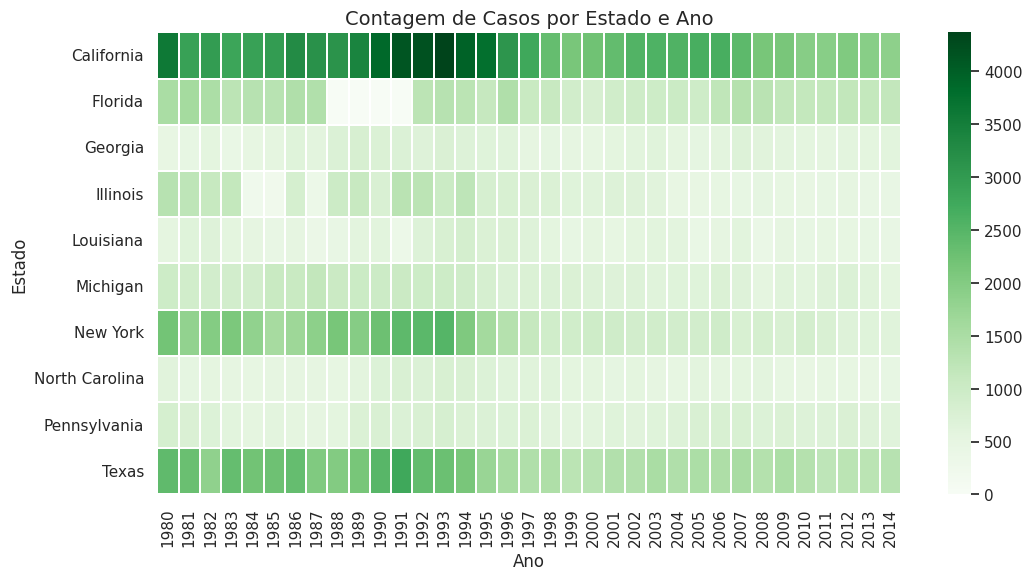

In [ ]:
case_state = df[['Year', 'State']]
total_cases_per_state = case_state.groupby('State').size().sort_values(ascending=False)
top_10_states = total_cases_per_state.head(10).index
filtered_df = case_state[case_state['State'].isin(top_10_states)]

# Calcular a contagem de casos por estado e ano para os top 10 estados
case_state_count = filtered_df.groupby(['State', 'Year']).size().unstack(fill_value=0)

sns.set(rc={"figure.figsize": (12, 6)})
fig, ax = plt.subplots()
ax = sns.heatmap(case_state_count, annot=False, fmt="d", linewidths=.1, cmap="Greens", annot_kws={"size": 20})
plt.title('Contagem de Casos por Estado e Ano', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Estado')

plt.show()

## Analisando a quantidade de Homicídios por Afogamento 💦

<Figure size 3000x1800 with 0 Axes>

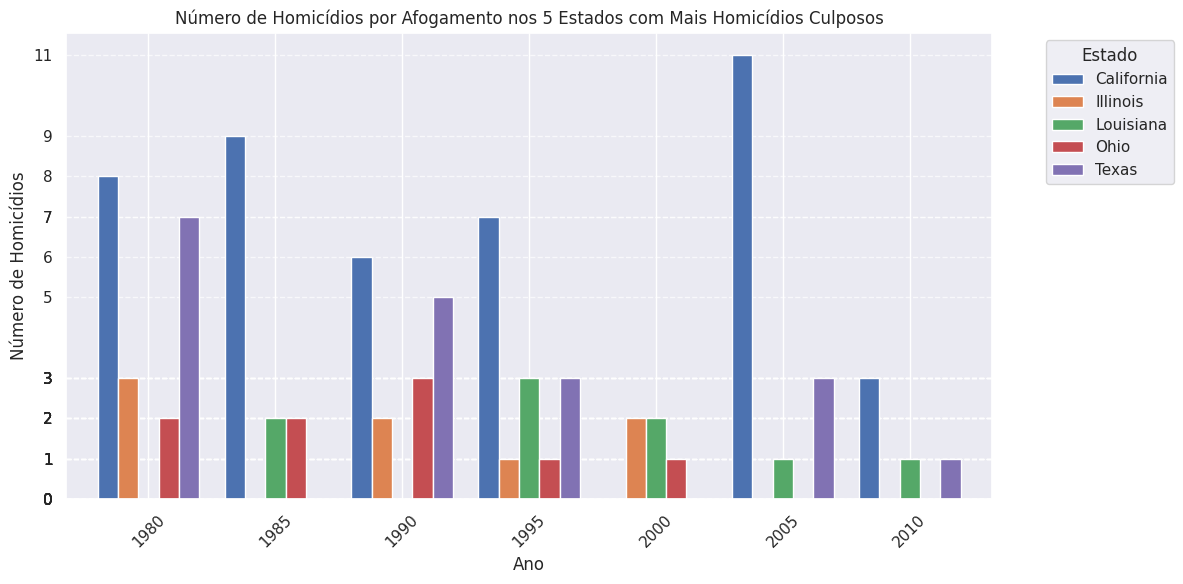

In [ ]:
# Filtrando os dados para os anos desejados
anos_desejados = [1980, 1985, 1990, 1995, 2000, 2005, 2010]
df_filtrado = df[df['Year'].isin(anos_desejados)]

# Filtrando os dados apenas para homicídios por afogamento
df_afogamento = df_filtrado[(df_filtrado['Crime Type'] == 'Murder or Manslaughter') & (df_filtrado['Weapon'] == 'Drowning')]

#  Encontrando os 5 estados com maior índice de assassinato
top_5_estados = df_afogamento['State'].value_counts().nlargest(5).index

# Filtrando os dados para os 5 estados com mais casos
df_top_5_estados = df_afogamento[df_afogamento['State'].isin(top_5_estados)]

# Agrupando por ano e contando o número de homicídios por afogamento
dados_agrupados = df_top_5_estados.groupby(['Year', 'State']).size().unstack().fillna(0)

plt.figure(figsize=(30, 18))
ax = dados_agrupados.plot(kind='bar', width=0.8)  # Definindo a largura das barras para 0.8

plt.title('Número de Homicídios por Afogamento nos 5 Estados com Mais Homicídios Culposos')
plt.xlabel('Ano')
plt.ylabel('Número de Homicídios')
plt.xticks(rotation=45)
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

alturas_barras = [barra.get_height() for barra in ax.patches]
plt.yticks(alturas_barras, [int(valor) for valor in alturas_barras])

plt.tight_layout()
plt.show()

É evidente a predominância da Califórnia como o estado com o maior número de homicídios por afogamento, seguido de perto pelo Texas. Essa observação ressalta a importância de medidas preventivas e políticas de segurança voltadas para esses estados, visando reduzir esses trágicos eventos.

## Analisando a Idade das Vítimas e dos Perpetradores ⌛

<Figure size 1200x800 with 0 Axes>

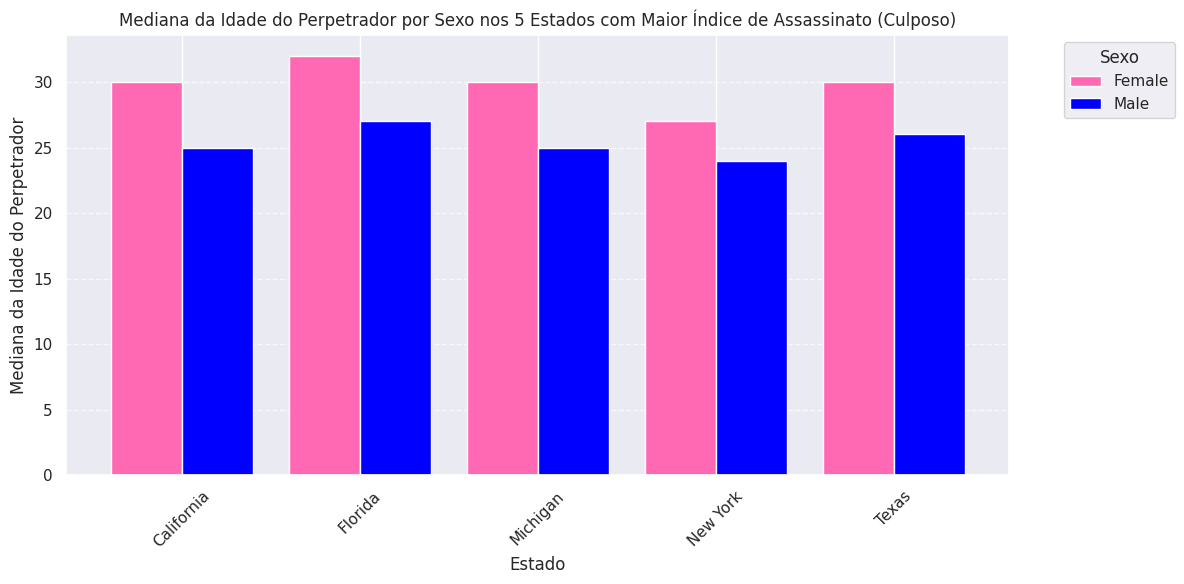

In [ ]:
# Encontrando os 5 estados com maior índice de assassinato
top_5_estados = df_filtrado['State'].value_counts().nlargest(5).index
df_top_5_estados = df_filtrado[df_filtrado['State'].isin(top_5_estados)]
df_assassinatos_culposos_5_estados = df_top_5_estados[df_top_5_estados['Crime Type'] == 'Murder or Manslaughter']
df_assassinatos_culposos_5_estados = df_assassinatos_culposos_5_estados[df_assassinatos_culposos_5_estados['Perpetrator Sex'] != 'Unknown']

# Calculando a mediana da idade do perpetrador por sexo
mediana_idade_perpetradores_5_estados = df_assassinatos_culposos_5_estados.groupby(['State', 'Perpetrator Sex'])['Perpetrator Age'].median().unstack()

# Fazendo o gráfico de barras
plt.figure(figsize=(12, 8))
mediana_idade_perpetradores_5_estados.plot(kind='bar', width=0.8, color=['hotpink', 'blue'])
plt.title('Mediana da Idade do Perpetrador por Sexo nos 5 Estados com Maior Índice de Assassinato (Culposo)')
plt.xlabel('Estado')
plt.ylabel('Mediana da Idade do Perpetrador')
plt.xticks(rotation=45)
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-14-89fc01402fe2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_assassinatos_culposos['Perpetrator Age'] = pd.to_numeric(df_assassinatos_culposos['Perpetrator Age'], errors='coerce')


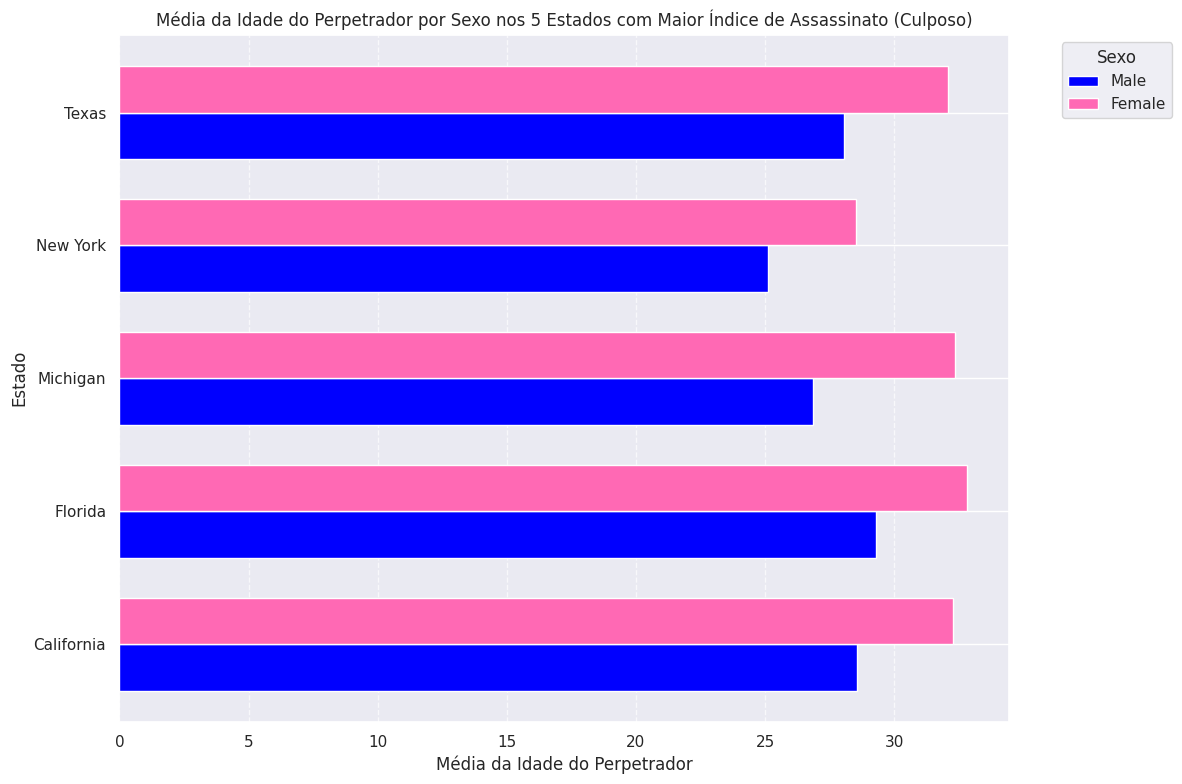

In [ ]:
# Encontrando os 5 estados com maior índice de assassinato
top_5_estados = df['State'].value_counts().nlargest(5).index

# Filtrando os dados para esses 5 estados
df_top_5_estados = df[df['State'].isin(top_5_estados)]

# Filtrando os dados apenas para assassinatos culposos
df_assassinatos_culposos = df_top_5_estados[df_top_5_estados['Crime Type'] == 'Murder or Manslaughter']

# Convertendo a coluna 'Perpetrator Age' para tipo numérico
df_assassinatos_culposos['Perpetrator Age'] = pd.to_numeric(df_assassinatos_culposos['Perpetrator Age'], errors='coerce')

# Calculando a média da idade do perpetrador por sexo
media_idade_perpetradores = df_assassinatos_culposos.groupby(['State', 'Perpetrator Sex'])['Perpetrator Age'].mean().unstack()

# Criando um gráfico de barras horizontal
plt.figure(figsize=(12, 8))

# Definindo a largura das barras
bar_width = 0.35

# Ajustando a posição das barras para que não se sobreponham
bar_positions_male = range(len(media_idade_perpetradores))
bar_positions_female = [pos + bar_width for pos in bar_positions_male]

# Criando as barras para o sexo masculino
plt.barh(bar_positions_male, media_idade_perpetradores['Male'], label='Male', color='blue', height=bar_width)

# Criando as barras para o sexo feminino
plt.barh(bar_positions_female, media_idade_perpetradores['Female'], label='Female', color='hotpink', height=bar_width)

# Definindo os rótulos do eixo y como os estados
plt.yticks([pos + bar_width / 2 for pos in bar_positions_male], media_idade_perpetradores.index)

plt.title('Média da Idade do Perpetrador por Sexo nos 5 Estados com Maior Índice de Assassinato (Culposo)')
plt.xlabel('Média da Idade do Perpetrador')
plt.ylabel('Estado')
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-15-9b24783a6d05>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_assassinatos_culposos_california['Perpetrator Age'] = pd.to_numeric(df_assassinatos_culposos_california['Perpetrator Age'], errors='coerce')


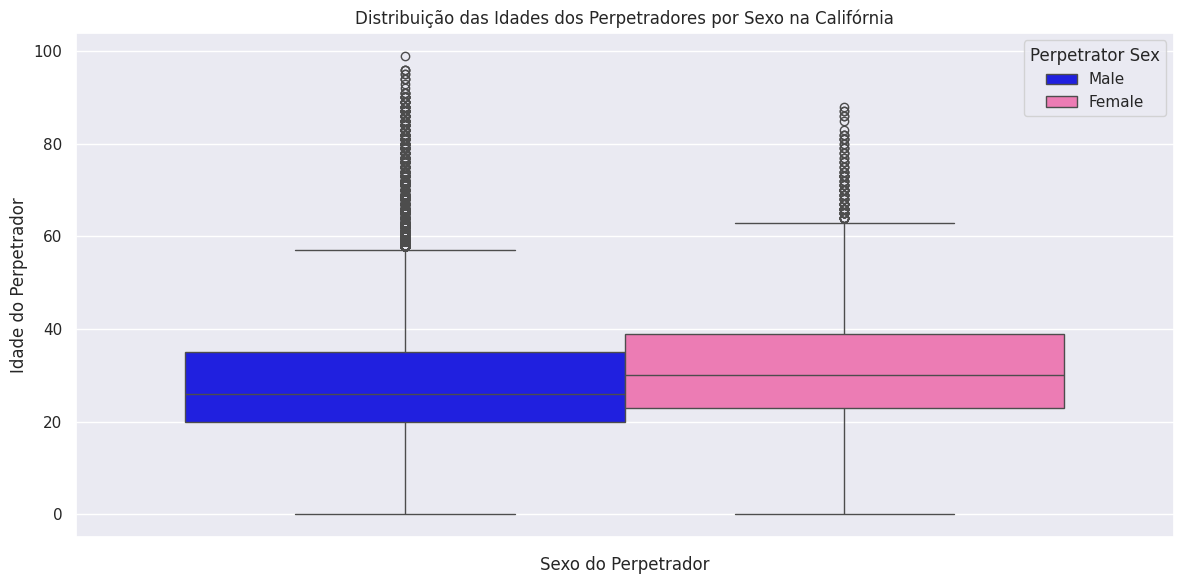

In [ ]:
# Filtrando os dados apenas para o estado da Califórnia
df_california = df[df['State'] == 'California']

# Filtrando os dados apenas para assassinatos culposos e removendo a categoria "Unknown"
df_assassinatos_culposos_california = df_california[(df_california['Crime Type'] == 'Murder or Manslaughter') & (df_california['Perpetrator Sex'] != 'Unknown')]

# Convertendo a coluna 'Perpetrator Age' para tipo numérico
df_assassinatos_culposos_california['Perpetrator Age'] = pd.to_numeric(df_assassinatos_culposos_california['Perpetrator Age'], errors='coerce')

# Criando um gráfico de boxplot para visualizar a distribuição das idades por sexo na Califórnia
sns.boxplot(x=None, y='Perpetrator Age', hue='Perpetrator Sex', data=df_assassinatos_culposos_california, palette={"Male": "blue", "Female": "hotpink"})
plt.title('Distribuição das Idades dos Perpetradores por Sexo na Califórnia')
plt.xlabel('Sexo do Perpetrador')
plt.ylabel('Idade do Perpetrador')
plt.tight_layout()
plt.show()

O limite superior do boxplot está maior para as mulheres do que para os homens, isso significa que há perpetradoras femininas com idades mais altas do que perpetradores masculinos nos dados analisados.

Embora a dispersão dos dados possa ser diferente entre homens e mulheres, os valores extremos estão distribuídos de maneira semelhante em ambas as distribuições.

In [ ]:
df_assassinatos_culposos_california_female = df_assassinatos_culposos_california[df_assassinatos_culposos_california['Perpetrator Sex'] == "Female"]
df_assassinatos_culposos_california_female.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000,5047.000000
mean,275286.144046,1993.831583,9.563107,32.014662,32.262334,0.097880,0.202695
std,183064.934167,9.726612,17.640213,22.095005,12.581204,0.466824,0.565847
min,1074.000000,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,122217.000000,1986.000000,1.000000,18.000000,23.000000,0.000000,0.000000
50%,246662.000000,1992.000000,2.000000,31.000000,30.000000,0.000000,0.000000
75%,420310.500000,2001.000000,7.000000,46.000000,39.000000,0.000000,0.000000
max,626522.000000,2014.000000,121.000000,99.000000,88.000000,6.000000,4.000000


In [ ]:
df_assassinatos_culposos_california_male = df_assassinatos_culposos_california[df_assassinatos_culposos_california['Perpetrator Sex'] == "Male"]
df_assassinatos_culposos_california_male.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,57595.000000,57595.000000,57595.000000,57595.000000,57595.000000,57595.000000,57595.000000
mean,291679.414533,1994.668825,10.847487,31.956941,28.545933,0.128761,0.308360
std,178013.626888,9.491950,18.648379,16.589463,13.060057,0.547261,0.689585
min,1069.000000,1980.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,143820.500000,1987.000000,1.000000,21.000000,20.000000,0.000000,0.000000
50%,270801.000000,1993.000000,2.000000,28.000000,26.000000,0.000000,0.000000
75%,435911.000000,2002.000000,9.000000,39.000000,35.000000,0.000000,0.000000
max,626526.000000,2014.000000,131.000000,998.000000,99.000000,10.000000,10.000000


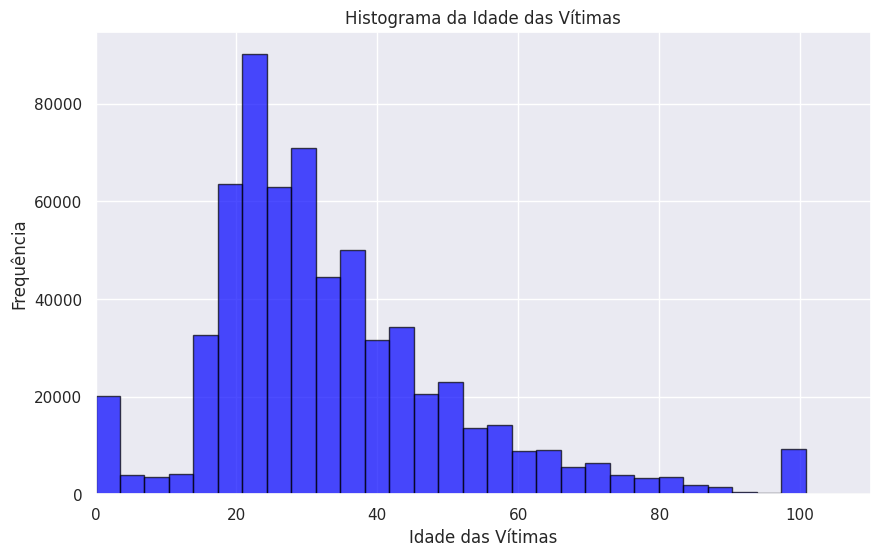

In [ ]:
num_bins1 = int(1 + 3.322 * (len(df['Victim Age'].dropna().values)**(1/3)))

plt.figure(figsize=(10, 6))
plt.hist(df['Victim Age'].dropna(), bins=num_bins1, color='blue', alpha=0.7, edgecolor='black')

plt.xlim(0, 110)

plt.xlabel('Idade das Vítimas')
plt.ylabel('Frequência')
plt.title('Histograma da Idade das Vítimas')
plt.grid(True)

plt.show()

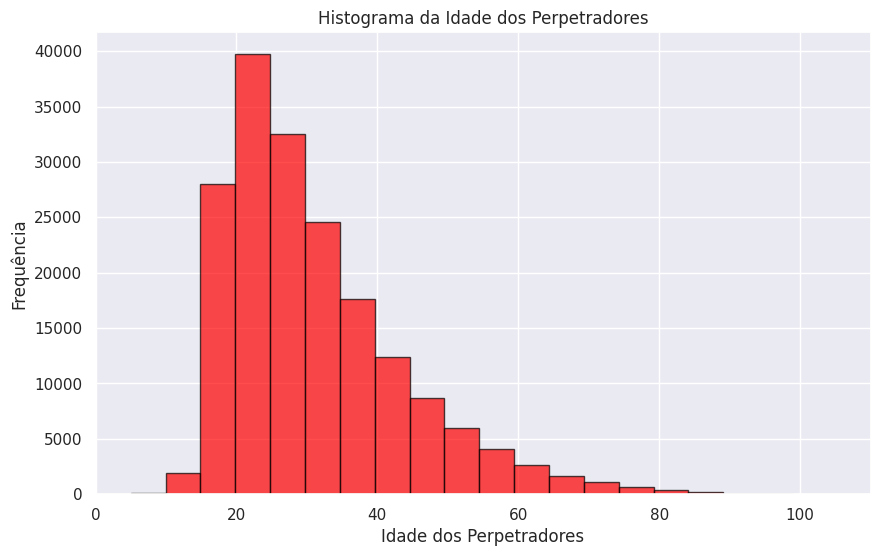

In [ ]:
df['Perpetrator Age'] = df['Perpetrator Age'].replace(' ', np.nan)

unknown_filter = ((df['Victim Ethnicity'] == 'Unknown') | (df['Perpetrator Sex'] == 'Unknown') | (df['Perpetrator Race'] == 'Unknown')).astype(int)
zero_age_filter = (pd.to_numeric(df['Perpetrator Age'], errors='coerce') < 5).astype(int)
df_filtered = df[(unknown_filter == 0) & (zero_age_filter == 0)]

perpetrator_age = df_filtered['Perpetrator Age'].dropna().astype(int)

# Calculando o número de bins (intervalos de classe) usando o método de Sturges
num_bins_sturges = int(np.ceil(1 + np.log2(len(perpetrator_age))))

plt.figure(figsize=(10, 6))
plt.hist(perpetrator_age, bins=num_bins_sturges, color='red', alpha=0.7, edgecolor='black')
plt.xlim(0, 110)
plt.xlabel('Idade dos Perpetradores')
plt.ylabel('Frequência')
plt.title('Histograma da Idade dos Perpetradores')
plt.grid(True)
plt.show()

## Analisando a relação entre a raça das vítimas 🕵

A concentração de pontos na faixa de 0 a 6 sugere que a maioria dos casos envolve uma contagem relativamente baixa de vítimas e perpetradores.

<ipython-input-20-c57e75841687>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Victim Age', y='Victim Race', data=df_filtered, palette='Set2')


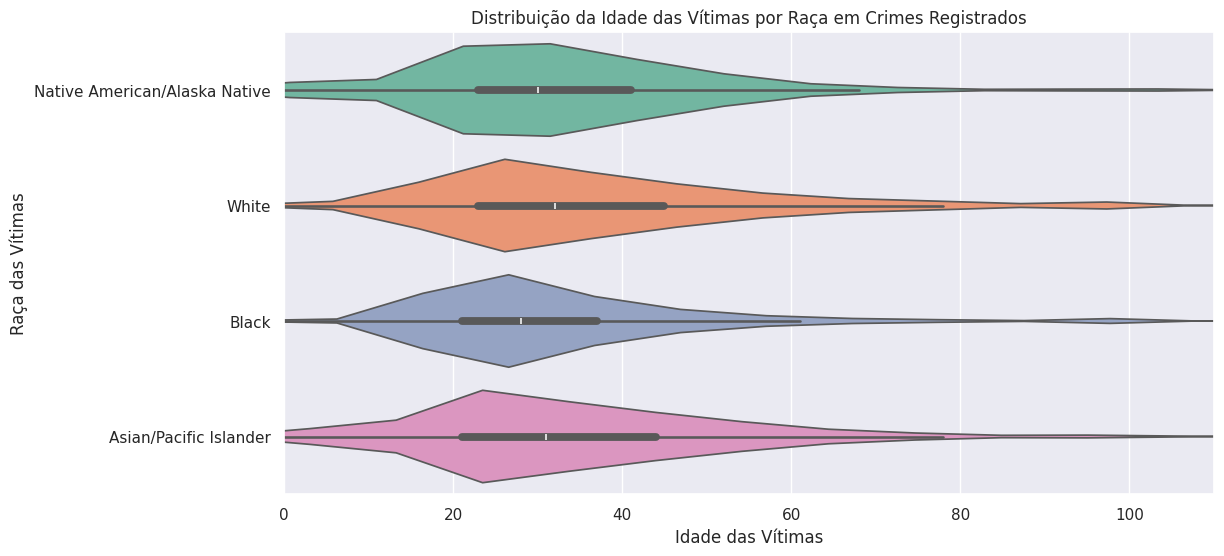

In [ ]:
df_filtered = df[df['Victim Race'] != 'Unknown']
plt.figure(figsize=(12, 6))
sns.violinplot(x='Victim Age', y='Victim Race', data=df_filtered, palette='Set2')
plt.xlim(0, 110)
plt.xlabel('Idade das Vítimas')
plt.ylabel('Raça das Vítimas')
plt.title('Distribuição da Idade das Vítimas por Raça em Crimes Registrados')
plt.show()

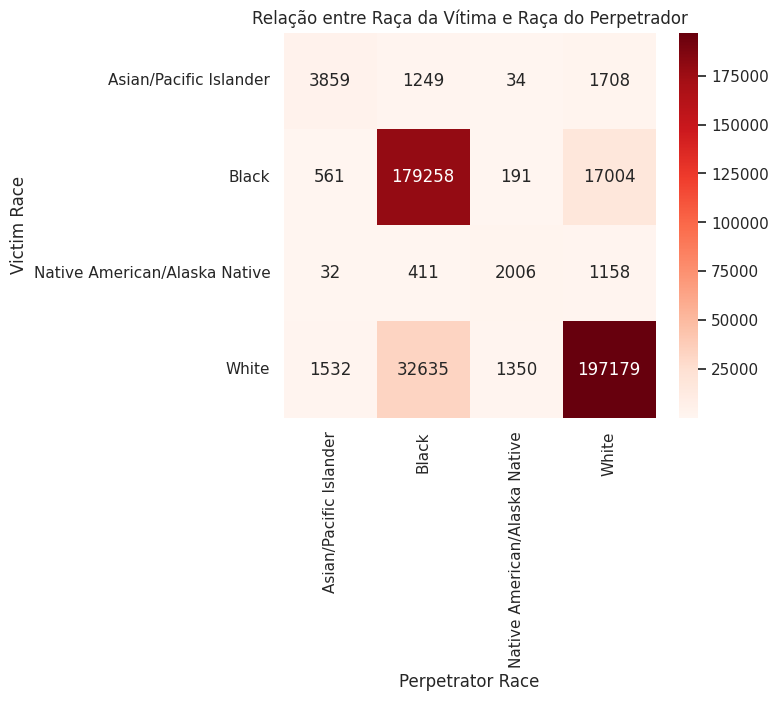

In [ ]:
df_filtered = df[df['Victim Race'] != 'Unknown']
df_filtered = df_filtered[df_filtered['Perpetrator Race'] != 'Unknown']
cross_tab = pd.crosstab(index=df_filtered['Victim Race'],
                        columns=df_filtered['Perpetrator Race'],
                        values=df_filtered['Record ID'],
                        aggfunc='count')

plt.figure(figsize=(6, 5))
sns.heatmap(cross_tab, cmap='Reds', annot=True, fmt='g')
plt.title('Relação entre Raça da Vítima e Raça do Perpetrador')
plt.show()

## Relação entre as Vítimas e os Assassinos 🧐

In [ ]:
df.Relationship.unique()

array(['Acquaintance', 'Unknown', 'Wife', 'Stranger', 'Girlfriend',
       'Ex-Husband', 'Brother', 'Stepdaughter', 'Husband', 'Sister',
       'Friend', 'Family', 'Neighbor', 'Father', 'In-Law', 'Son',
       'Ex-Wife', 'Boyfriend', 'Mother', 'Common-Law Husband',
       'Common-Law Wife', 'Stepfather', 'Stepson', 'Stepmother',
       'Daughter', 'Boyfriend/Girlfriend', 'Employer', 'Employee'],
      dtype=object)

<ipython-input-23-e4d0efe10d53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=relation_counts.index, y=relation_counts.values, palette='viridis')


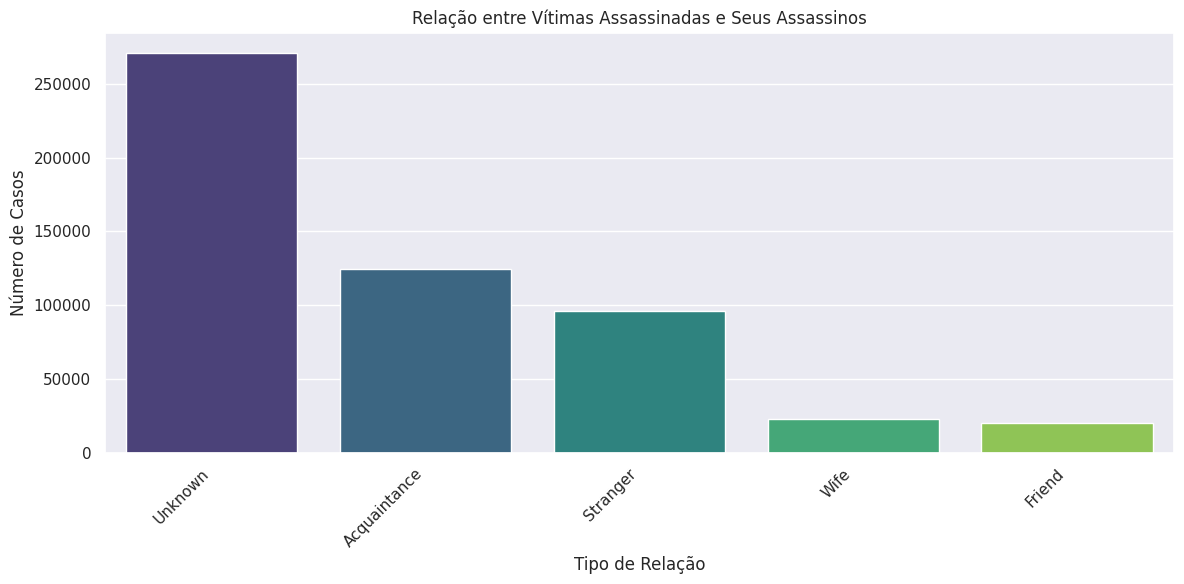

In [ ]:
df_murder = df[df['Crime Type'] == 'Murder or Manslaughter']

relation_counts = df_murder['Relationship'].value_counts().nlargest(5)

sns.barplot(x=relation_counts.index, y=relation_counts.values, palette='viridis')
plt.title('Relação entre Vítimas Assassinadas e Seus Assassinos')
plt.xlabel('Tipo de Relação')
plt.ylabel('Número de Casos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df.Year.unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014])

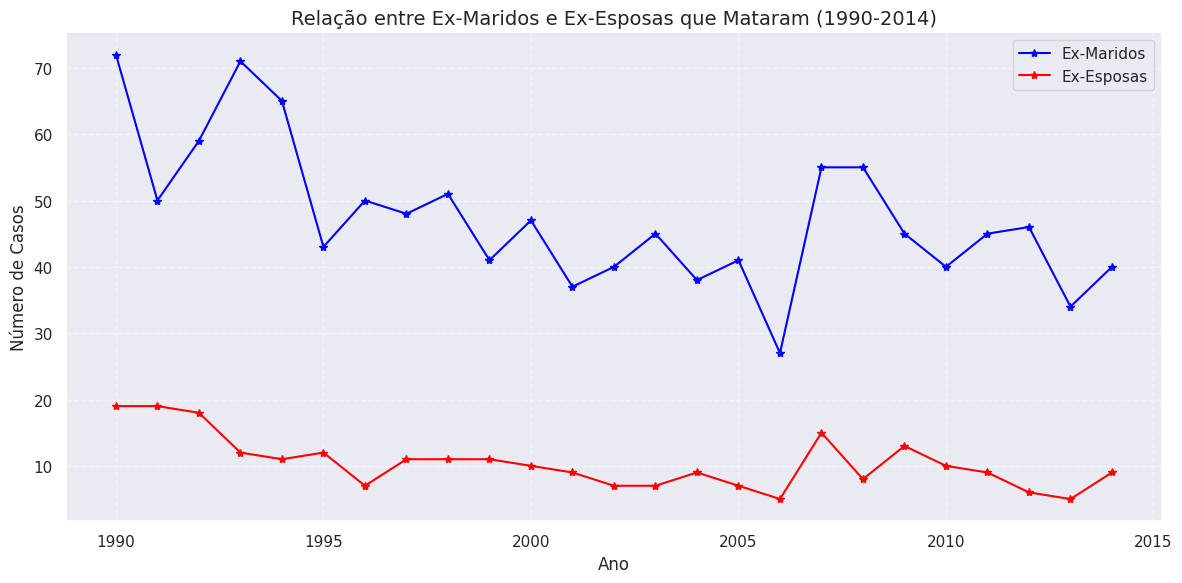

In [ ]:
# Filtrando os dados para incluir apenas os anos de interesse
df_years = df[df['Year'] >= 1990]

# Filtrando casos de assassinato envolvendo ex-maridos e ex-esposas
df_ex_marido = df_years[(df_years['Perpetrator Sex'] == 'Male') &
                         (df_years['Relationship'] == 'Ex-Wife') &
                         (df_years['Victim Sex'] == 'Female')]

df_ex_esposa = df_years[(df_years['Perpetrator Sex'] == 'Female') &
                         (df_years['Relationship'] == 'Ex-Husband') &
                         (df_years['Victim Sex'] == 'Male')]

# Contando o número de casos para cada categoria em cada ano
ex_marido_counts = df_ex_marido.groupby('Year').size().reset_index(name='Ex-Maridos')
ex_esposa_counts = df_ex_esposa.groupby('Year').size().reset_index(name='Ex-Esposas')

# Combinando os DataFrames
df_comparison = pd.merge(ex_marido_counts, ex_esposa_counts, on='Year', how='outer')

# Criando o gráfico de linhas para cada gênero
plt.figure(figsize=(12, 6))

# Linha para ex-maridos com marcadores de asterisco
plt.plot(df_comparison['Year'], df_comparison['Ex-Maridos'], label='Ex-Maridos', color='blue', marker='*')

# Linha para ex-esposas com marcadores de asterisco
plt.plot(df_comparison['Year'], df_comparison['Ex-Esposas'], label='Ex-Esposas', color='red', marker='*')

# Adicionando rótulos e título
plt.title('Relação entre Ex-Maridos e Ex-Esposas que Mataram (1990-2014)', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)

# Adicionando legenda
plt.legend()

# Exibindo o gráfico
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


O gráfico ilustra a relação entre ex-maridos e ex-esposas como perpetradores em casos de assassinato entre os anos de 1990 e 2014. Uma análise dos dados revela uma tendência consistente: o número de casos cometidos por ex-maridos é geralmente superior ao registrado para ex-esposas ao longo desse período. Além disso, as linhas de regressão linear sugerem que os casos envolvendo ambos ex-maridos e esposas tendem a diminuir ao longo do tempo, exceto para os ex-maridos nos anos de 2007 e 2008.

In [ ]:
df.Weapon.unique()

array(['Blunt Object', 'Strangulation', 'Unknown', 'Rifle', 'Knife',
       'Firearm', 'Shotgun', 'Fall', 'Handgun', 'Drowning', 'Suffocation',
       'Explosives', 'Fire', 'Drugs', 'Gun', 'Poison'], dtype=object)

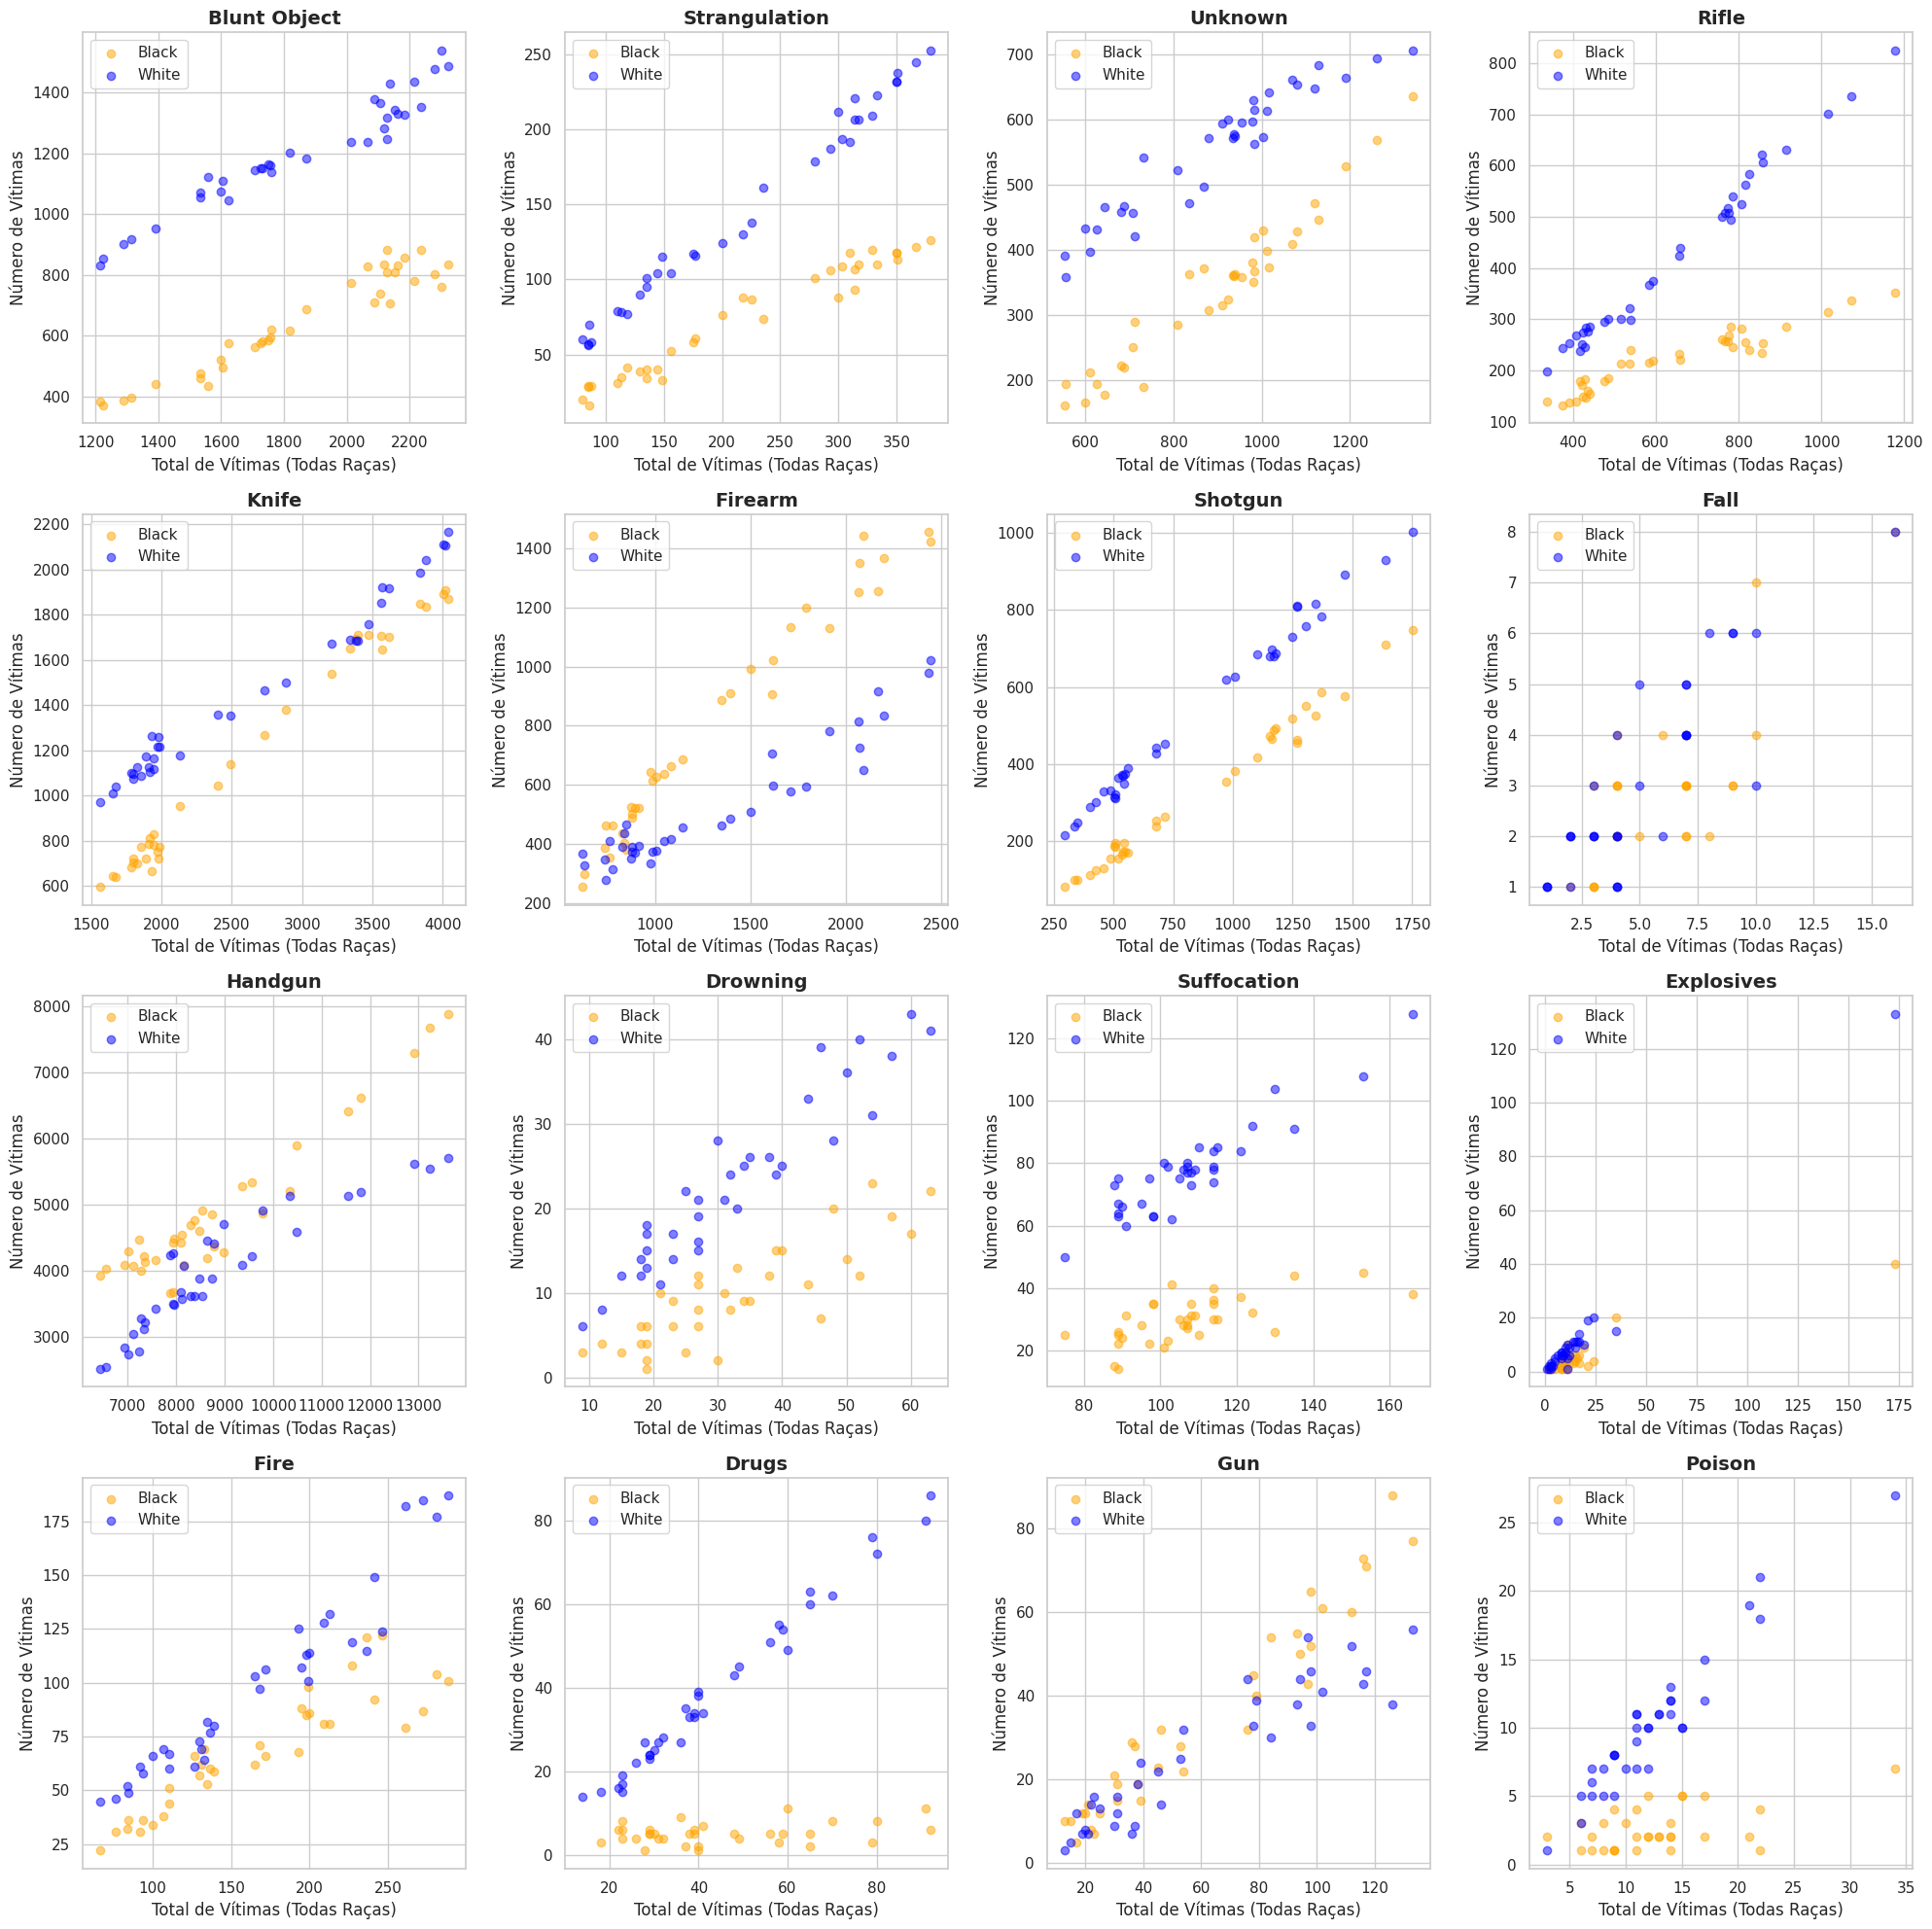

In [ ]:
# Lista de armas
W = ['Blunt Object', 'Strangulation', 'Unknown', 'Rifle', 'Knife',
     'Firearm', 'Shotgun', 'Fall', 'Handgun', 'Drowning', 'Suffocation',
     'Explosives', 'Fire', 'Drugs', 'Gun', 'Poison']

df_filtered = df[(df['Victim Race'].isin(['Black', 'White']))]

# Agrupar por ano, raça e arma
VictimRaceWeaponByYear = df_filtered.groupby(['Year', 'Victim Race', 'Weapon'])['Record ID'].count().reset_index()
VictimRaceWeaponByYear = VictimRaceWeaponByYear.rename(columns={'Record ID': 'Number'})
VictimRaceWeaponByYear['TotalRaceVictim'] = VictimRaceWeaponByYear.groupby(['Year', 'Weapon'])['Number'].transform(sum)
VictimRaceWeaponByYear['Percentage'] = round((VictimRaceWeaponByYear['Number'] / VictimRaceWeaponByYear['TotalRaceVictim']) * 100, 2)
VictimRaceWeaponByYear = VictimRaceWeaponByYear.sort_values(by=['Year', 'Weapon', 'Number', 'Victim Race'], ascending=[True, True, False, True])
VictimRaceWeaponByYear['Rank'] = VictimRaceWeaponByYear.groupby(['Year', 'Weapon'])['Number'].rank(method='dense', ascending=False)

# Criar gráficos de dispersão para cada arma
sns.set_style('whitegrid')
plt.figure(figsize=(20, 20))
plt.subplots_adjust(bottom=0.1, left=.05, right=1.5, top=0.9, hspace=.35, wspace=.35)

for i, weapon in enumerate(W):
    plt.subplot(4, 4, i + 1)
    plt.title(weapon, fontsize=14, fontweight='bold')

    weapon_data = VictimRaceWeaponByYear[VictimRaceWeaponByYear['Weapon'] == weapon]

    black = weapon_data[weapon_data['Victim Race'] == 'Black']
    white = weapon_data[weapon_data['Victim Race'] == 'White']

    x = black['TotalRaceVictim']
    y = black['Number']
    x1 = white['TotalRaceVictim']
    y1 = white['Number']

    plt.scatter(x, y, c='orange', label='Black', alpha=0.5)
    plt.scatter(x1, y1, c='blue', label='White', alpha=0.5)
    plt.xlabel('Total de Vítimas (Todas Raças)')
    plt.ylabel('Número de Vítimas')
    plt.legend()

plt.tight_layout()
plt.show()